<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/J_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic:** AI/ML

**Title:** Clustering (KMeans)

**Author:** Luiz Barboza

**Date:** 20/dec/22

**Lang:** Julia

**Site:** https://quant-research.group/

**Email:** contato@quant-research.group


# Julia Installation

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.3" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

In [1]:
versioninfo()

Julia Version 1.8.3
Commit 0434deb161e (2022-11-14 20:14 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  LD_PRELOAD = /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4
  JULIA_NUM_THREADS = 2


# Custering

In [ ]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
Pkg.add("Lathe") 
Pkg.add("Clustering") 

using CSV
using DataFrames
using Statistics
using StatsPlots
using Lathe
using Lathe.preprocess: TrainTestSplit
using Clustering


In [ ]:
;wget https://raw.githubusercontent.com/lcbjrrr/data/main/cluster%20-%20all.csv

In [4]:
#read csv
df=CSV.read("cluster - all.csv", DataFrame)
first(df,5)

,salary,balance
,Int64,Int64
1,2919,239
2,4677,1565
3,2229,1855
4,4527,466
5,1751,357


## KMeans

In [19]:
train, test = TrainTestSplit(df,.70)

(14×2 DataFrame
 Row │ salary  balance 
     │ Int64   Int64   
─────┼─────────────────
   1 │   2919      239
   2 │   4677     1565
   3 │   2229     1855
   4 │   1751      357
   5 │   2562      523
   6 │   4865    -1866
   7 │   9206     4063
   8 │   8087     1935
   9 │  17844    17624
  10 │   5317     2610
  11 │  15503     5117
  12 │  14233    18879
  13 │  10091    13780
  14 │  15485     2963, 6×2 DataFrame
 Row │ salary  balance 
     │ Int64   Int64   
─────┼─────────────────
   1 │   4527      466
   2 │   2337    -1101
   3 │   2196    -1416
   4 │   2507     1998
   5 │  17125    18092
   6 │  10257    10975)

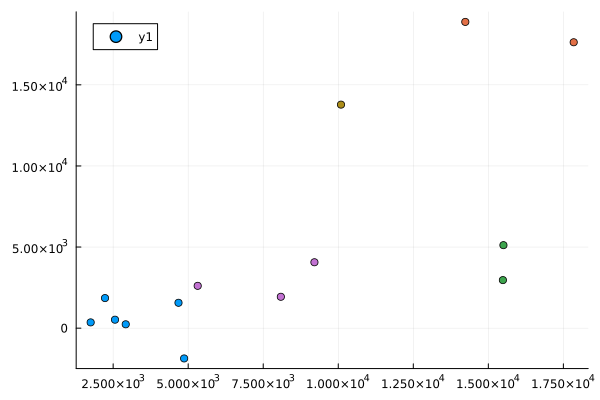

In [20]:
pred_train = kmeans(Matrix(train[!,[:salary,  :balance]])', 5).assignments
scatter(train.salary,train.balance,color=pred_train)

In [22]:
pred_test = kmeans(Matrix(test[!,[:salary,  :balance]])', 5).assignments

6-element Vector{Int64}:
 1
 5
 5
 4
 2
 3

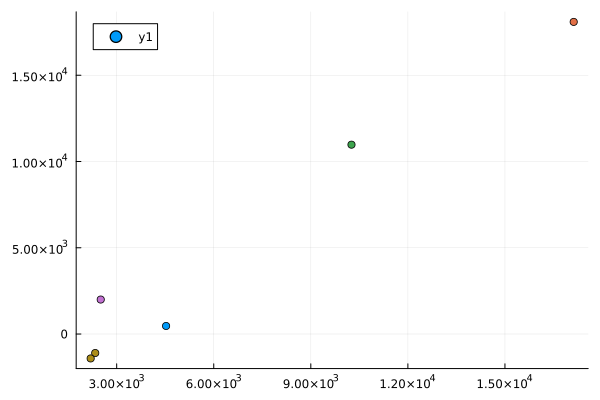

In [23]:
scatter(test.salary,test.balance,color=pred_test)